In [47]:
import os, glob
import xarray as xr
import numpy as np

In [28]:
folders = glob.glob(f'/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Calib_all_HH_MOASMO/*_SpinupFiles')
folders.sort()

for f in folders:
    file = glob.glob(f'{f}/*.r.*.nc')
    if len(file)!=1:
        print(f)

/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Calib_all_HH_MOASMO/level1_239_SpinupFiles
/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Calib_all_HH_MOASMO/level1_249_SpinupFiles
/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Calib_all_HH_MOASMO/level1_316_SpinupFiles
/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Calib_all_HH_MOASMO/level1_325_SpinupFiles
/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Calib_all_HH_MOASMO/level1_537_SpinupFiles
/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Calib_all_HH_MOASMO/level1_541_SpinupFiles


In [45]:
ds=xr.load_dataset('/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/data_mesh_surf/HillslopeHydrology/disaggregation/surfdata_CAMELS_level1_hist_78pfts_CMIP6_simyr2000_c231115_325.nc')
ds

<xarray.Dataset>
Dimensions:                  (gridcell: 1, nlevsoi: 10, natpft: 15, cft: 64,
                              time: 12, lsmpft: 79, numurbl: 3, numrad: 2,
                              nlevurb: 5, nglcecp1: 11, nglcec: 10)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: gridcell, nlevsoi, lsmpft, numurbl, numrad,
                                nlevurb, nglcecp1, nglcec
Data variables: (12/77)
    mxsoil_color             int32 20
    SOIL_COLOR               (gridcell) int32 14
    PCT_SAND                 (nlevsoi, gridcell) float64 43.0 43.0 ... 47.0 47.0
    PCT_CLAY                 (nlevsoi, gridcell) float64 20.0 20.0 ... 22.0 22.0
    ORGANIC                  (nlevsoi, gridcell) float64 22.4 22.82 ... 0.0 0.0
    FMAX                     (gridcell) float64 0.3859
    ...                       ...
    CONST_HARVEST_SH2        (gridcell) float64 0.0
    CONST_HARVEST_SH3        (gridcell) float64 0.0
    CONST_GRAZING            (gridcell) float64 -9.999e+03
    CONST_FERTNITRO_CFT      (cft, gridcell) float64 0.0 0.0 14.58 ... 0.0 0.0
    UNREPRESENTED_PFT_LULCC  (natpft, gridcell) float64 0.0 0.0 0.0 ... 0.0 0.0
    UNREPRESENTED_CFT_LULCC  (cft, gridcell) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/47)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 11-17-23 10:05:09
    Logname:                              swensosc
    Host:                                 cheyenne6
    Source:                               Community Land Model: CLM5
    Version:                              ctsm5.1.dev150/glade/scratch/swenso...
    ...                                   ...
    Soil_texture_raw_data_file_name:      mksrf_soitex.10level.c010119.nc
    Soil_color_raw_data_file_name:        mksrf_soilcolor_CMIP6_simyr2005.c17...
    Fmax_raw_data_file_name:              mksrf_fmax_0.125x0.125_c200220.nc
    Organic_matter_raw_data_file_name:    mksrf_organic_10level_5x5min_ISRIC-...
    Lai_raw_data_file_name:               mksrf_lai_78pfts_simyr2005.c170413.nc
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_2000.c...

In [46]:
ds.LATIXY.values[0], ds.LONGXY.values[0]-360

(45.23428804062947, -102.38030296073532)

In [54]:
ds=xr.open_dataset('/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Calib_all_HH_MOASMO/level1_45_SubsetForcing/Precip//subset_clmforc.E5LEME.c2023.010x010.Precip.1951-1955.nc')
ds

<xarray.Dataset>
Dimensions:   (time: 43800, lat: 5, lon: 6, scalar: 1)
Coordinates:
  * time      (time) object 1951-01-01 00:30:00.000054 ... 1955-12-31 23:29:5...
Dimensions without coordinates: lat, lon, scalar
Data variables:
    LONGXY    (lat, lon) float32 ...
    LATIXY    (lat, lon) float32 ...
    EDGEE     (scalar) float32 ...
    EDGEW     (scalar) float32 ...
    EDGES     (scalar) float32 ...
    EDGEN     (scalar) float32 ...
    PRECTmms  (time, lat, lon) float32 ...
Attributes:
    CDI:            Climate Data Interface version 2.0.2 (https://mpimet.mpg....
    Conventions:    CF-1.6
    creation_date:   
    conventions:     
    case_title:     ERA5-Land 1-Hourly Atmospheric Forcing: Precipitation
    history:        Wed Nov 29 16:17:20 2023: cdo mergetime /glade/work/guoqi...
    CDO:            Climate Data Operators version 2.0.1 (https://mpimet.mpg....

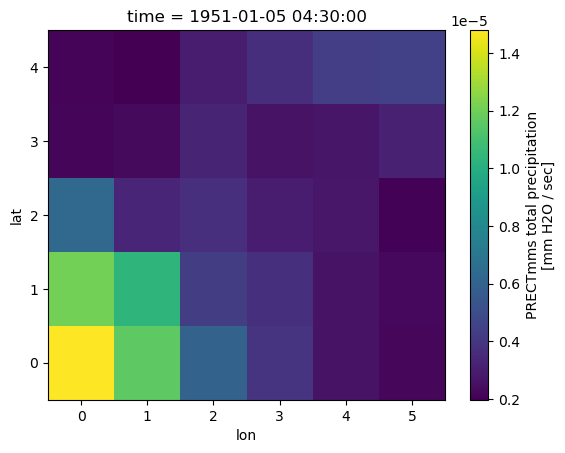

In [57]:
ds.PRECTmms.isel(time=100).plot()